<a href="https://colab.research.google.com/github/nay-ramos/analiseDados/blob/main/startingProjects/SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **SuperStore**
  <code style="color:#4a304f"><font color= #d689e6>Nível 1</font></code>   <code style="color:#4a304f"><font color= #d689e6>Nível 2</font></code>

 Nesses níveis, a gente apredeu sobre:

*   Conceitos básicos de Análise de Dados
*   Fórmulas básicas de Google Sheets
*   EDA
*   Tabela dinâmica
*   Criação de Dashboard
*   Gráficos e cores


Perguntas para direcionar a exploração dos dados:


1.   **Quais estados trazem mais lucro para a SuperStore?**
2.   **Qual região performa melhor nas vendas?**
3.   **Qual a relação entre descontos e vendas?**

---

**Etapas do processo:**
  1. Entender o dataset
  2. EDA
  3. Criação de tabelas relacionadas com as perguntas iniciais
  4. Criação de dashboards com os gráficos mais relevante

---


### **O dataset**

><font size=2>>>> [Superstore - Kaggle.com](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting) por Rohit Sahoo </font>


>Esse dataset é o registro de vendas de 4 anos de uma empresa de varejo nos Estados Unidos, cada linha representa uma venda. De modo geral, ele trás informações como: cliente, data da venda, data de envio, categoria e subcategoria do produto, preço, país/estado/cidade do cliente.


In [ ]:
import pandas as pd
import numpy as np

dfsuperstore = pd.read_csv('/content/drive/MyDrive/telos/Módulo 2/superstore.csv')
dfsuperstore.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


### Tratando os dados

* **Tratar dados Nulos e linhas repetidas**
* **Corrigir tipos inadequados**
    * <font size="2"> Tipos moeda e data para os respectivos campos</font>
* **Padronizar valores financeiros e de data**

  * <font size="2">correção de data para dd/mm/aaaa</font>
  * <font size="2"> criar coluna para associar cada linha à seu ano de venda</font>
  * <font size="2"> substituição de pontos e vírgulas para os valores monetários e definição da moeda pra dólar</font>
   <font size="1"> (a SuperStore vende nos EUA - USD)</font>
  



In [ ]:
# dataset depois do tratamento

clean_superstore = pd.read_csv('/content/drive/MyDrive/telos/Módulo 2/clean_superstore.csv')
clean_superstore.head(4)

,id linha,Id pedido,Data Pedido,marcador mensal pedido,Data envio,Modo de Envio,Id do cliente,Nome do cliente,Tipo de cliente,País,...,CEP,Região,Id do produto,Product Name,Categoria do Produto,subcategoria do produto,Valor da venda,Qtd,Desconto,Lucro
0,1.0,CA-2016-152156,11/08/2016,01/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases,"$261,96",2,0%,"$41,91"
1,2.0,CA-2016-152156,11/08/2016,01/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,"$731,94",3,0%,"$219,58"
2,3.0,CA-2016-138688,06/12/2016,01/12/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,"$14,62",2,0%,"$6,87"
3,4.0,US-2015-108966,10/11/2015,01/11/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,"$957,58",5,45%,"-$383,03"


### Explorando os dados
* Foram tiradas as medidas centrais (média, moda e mediana) das colunas numéricas para depois fazer a exploração dos dados com tabelas dinâmicas.
* Alguns exemplos de tabela dinâmicas em busca de informações que chamem atenção


<div>
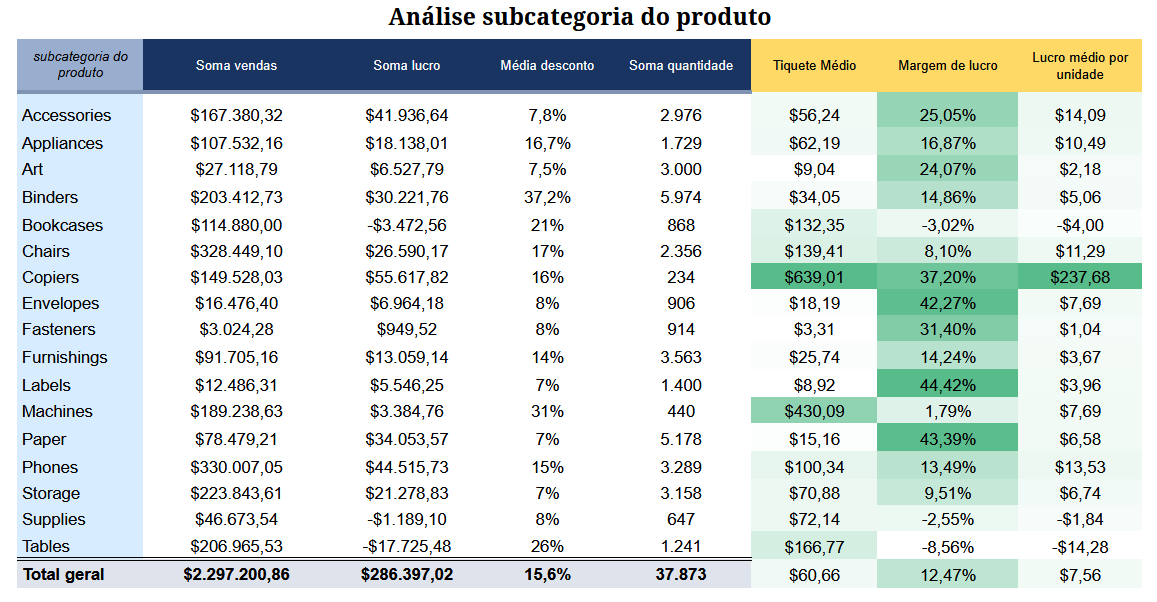
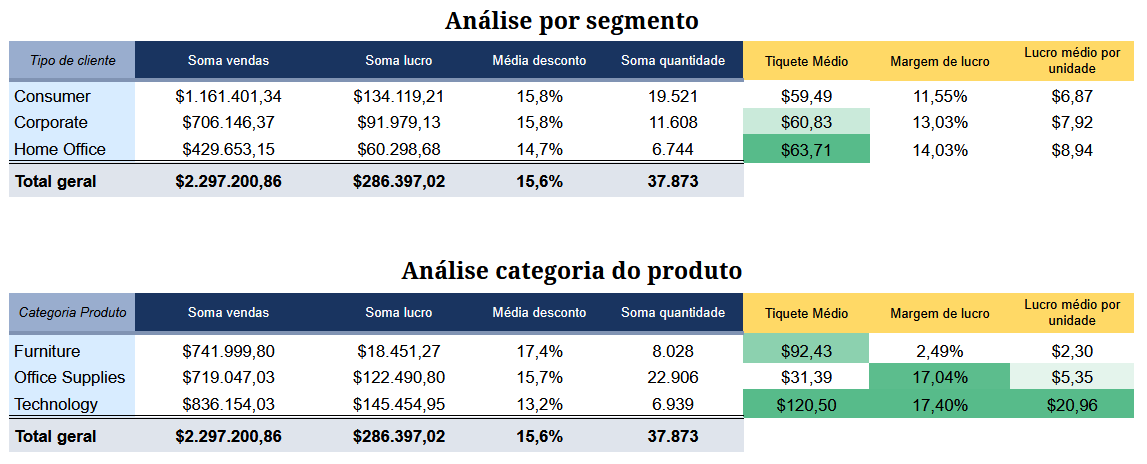
</div>

**Percepções da fase exploratória:**
*  A zona Oeste vende melhor
*  A maior parte dos compradores são consumidores finais
*  o existe correlação vendas x deconto por estado e região


### Criação de tabelas para responder as perguntas


*   Vendas por Região
*   Lucro por Estado
*   Lucro x Pedidos
*   Desconto x quantidade de pedidos ao longo do tempo




<div>
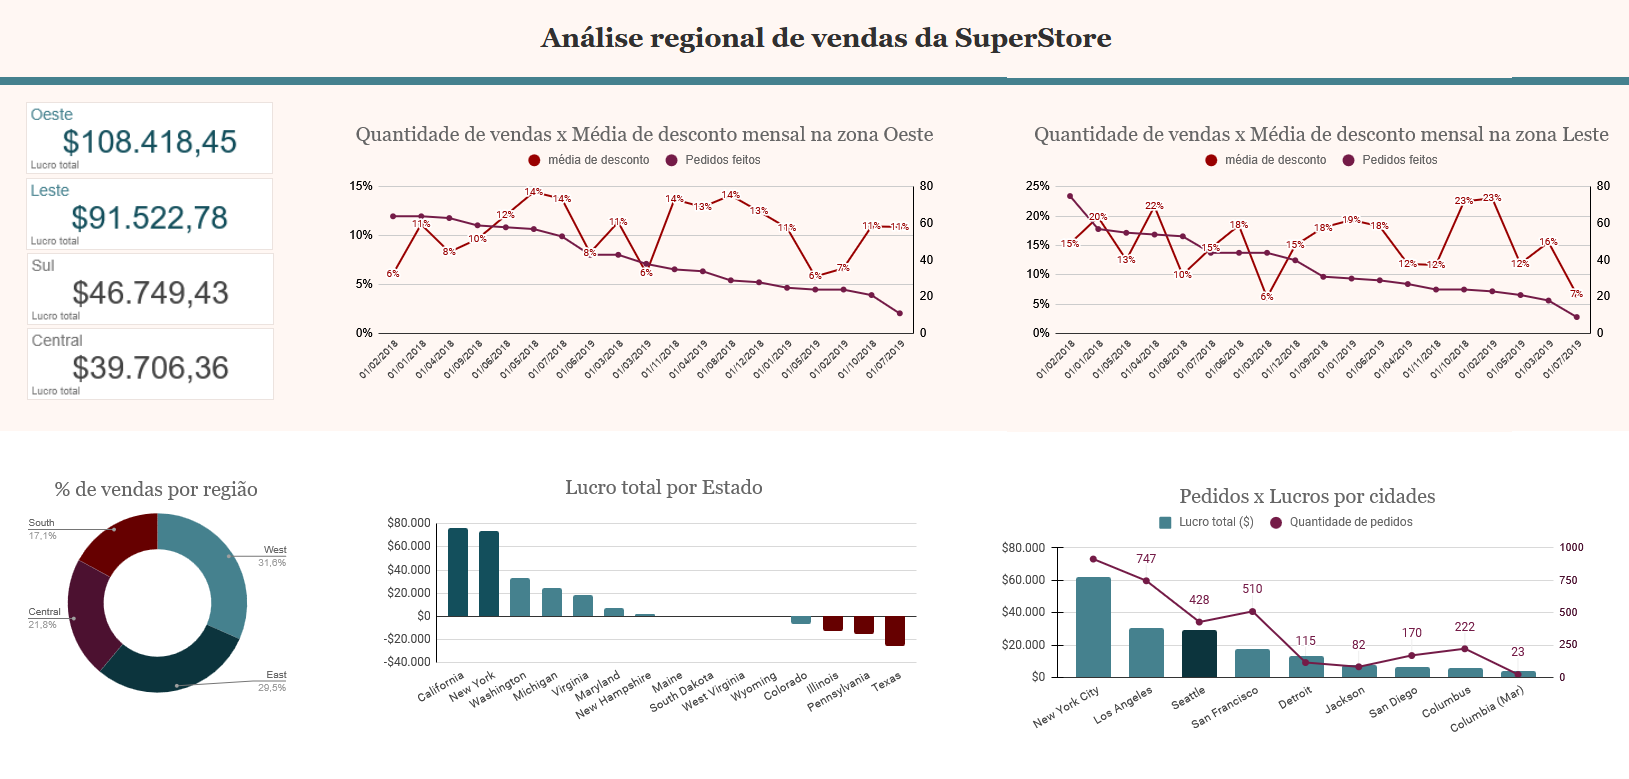
</div>